# Assignment1. KNN & Softmax classifier

In [1]:
import numpy as np
import random
import os
import matplotlib.pyplot as plt
import _pickle as pickle
import time
import pandas as pd

from YourAnswer import naive_softmax_loss, vectorized_softmax_loss, Softmax
from YourAnswer import predictKNN
from utils import plotData, vis_decision_boundary
# set default plot options
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0)
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

## Part1. K-Nearest Neighbors

<p>KNN is a form of <i>instance</i>, or <i>memory</i> based learning wherein we don't learn a function $f(X)$ to estimate $E[Y|X]$. It is a nonlinear, nonparametric model. To make a classification for a given instance ${I}_{i}$, we search the training data for the $k$-nearest neighbors, as defined by some distance metric $d({I}_{i},{I}_{j})$, and take majority vote from $k$ closest points.
<br>
<br>
So, we need a distance metric to determine closest points. The most common distance function used in k-NN is the <i>Euclidean Distance</i>.<br><br>

Let ${I} = <I^1,...I^p>$ be a $p$-dimensional vector, then for two instances $i \text{ and } j$:<br><br>
<center>$d_2({I}_{i},{I}_{j}) = \sqrt{(I_i^{1}-I_j^{1})^2+...+(I_i^{p}-I_j^{p})^2} = \sqrt{\sum\limits_{t=1}^p (I_i^{t}-I_j^{t})^2}$
</center>
<br><br>

See here for more information, 
(https://en.wikipedia.org/wiki/K-nearest_neighbors_algorithm)
</p>

### 1. Data preparation

#### what does the data look like?

In [2]:
data1 = pd.read_csv("ex1_data1.txt", header=None, names=['test1', 'test2', 'accepted'])
data1.head()

,test1,test2,accepted
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


Text(0, 0.5, 'Exam 2 score')

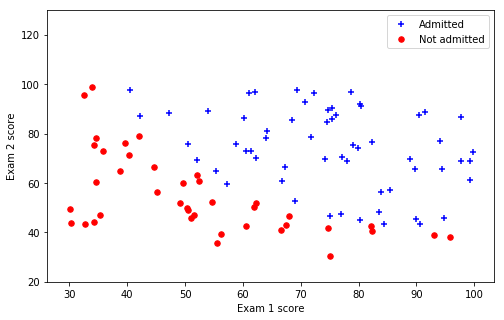

In [3]:
ax = plotData(data1)
ax.set_ylim([20, 130])
ax.legend(['Admitted', 'Not admitted'], loc='best')
ax.set_xlabel('Exam 1 score')
ax.set_ylabel('Exam 2 score')

#### data shape

In [4]:
X = data1[['test1', 'test2']].values
y = data1.accepted.values
n, d = X.shape
n, d

(100, 2)

### 2. Modeling
To obtain the correct results, please fill your code in YourAnswer.py

In [5]:
k=3
result_knn = predictKNN(X,X,y,k)

Text(0, 0.5, 'Exam 2 score')

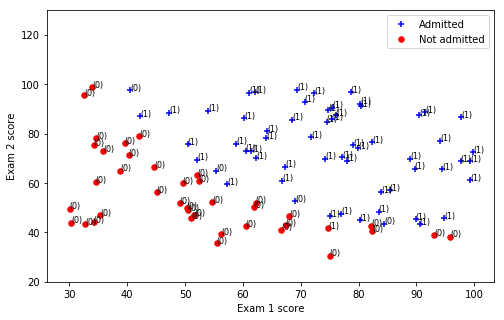

In [6]:
ax = plotData(data1)
ax.set_ylim([20, 130])
i = 0
for xy in zip(X[:,0],X[:,1]):
    ax.annotate('(%s)' % int(result_knn[i]), xy=xy, textcoords='data',size=8)
    i += 1
ax.set_ylim([20, 130])
ax.legend(['Admitted', 'Not admitted'], loc='best')
ax.set_xlabel('Exam 1 score')
ax.set_ylabel('Exam 2 score')

In [7]:
print ('K-nearest neighbors, k = '+str(k)+', training accuracy : ' + str(np.mean(result_knn == y)))

K-nearest neighbors, k = 3, training accuracy : 0.95


### 3. Decision boundary

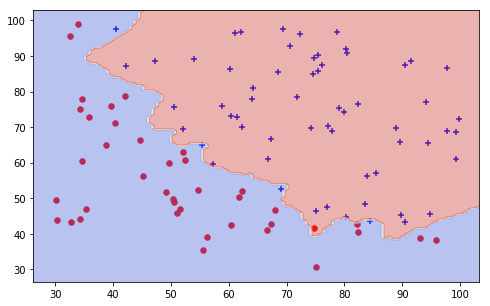

<Figure size 432x288 with 0 Axes>

In [8]:
plotData(data1)
vis_decision_boundary(X, y, k)
plt.show()
plt.tight_layout()

Let's plot the training accuracy when k becomes large.

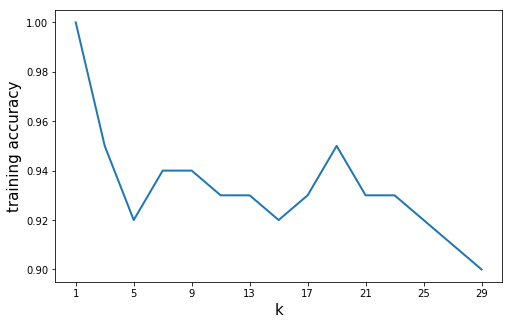

In [9]:
accuracy_from_dif_k = np.zeros((15,))

for i, dif_k in enumerate(range(1,30,2)):
    result_knn = predictKNN(targetX=X, dataSet=X, labels=y, k=dif_k)
    accuracy = np.mean(result_knn == y)
    accuracy_from_dif_k[i] = accuracy
    
#print ('K-nearest neighbors, k = '+str(k)+', training accuracy : ' + str(np.mean(result_knn == y)))    
plt.figure(figsize=(8,5))
plt.plot(accuracy_from_dif_k, linewidth=2.0)
plt.xticks(np.arange(0,15,2),np.arange(1,30,4))
plt.ylabel('training accuracy',fontsize=15)
plt.xlabel('k',fontsize=15)
plt.show()

## Part2. Softmax classifier

### 1. Set up input preprocessing

We will use CIFAR-10 dataset, which has ten classes. In usual, you need to download it from website, but we have already downloaded and attached it for you. 

In [10]:
# Load all of CIFAR10 dataset.
def load_CIFAR10(root):
    xs = []
    ys = []
    for b in range(1,6):
        f = os.path.join(root, 'data_batch_%d' % (b, ))
        with open(f, 'rb') as f:
            datadict = pickle.load(f, encoding='latin1')
            X = datadict['data']
            Y = datadict['labels']
            X = X.reshape(10000,3,32,32).transpose(0,2,3,1).astype("float")
            Y = np.array(Y)
        #X, Y = load_CIFAR_batch(f)
        xs.append(X)
        ys.append(Y)
    Xtr = np.concatenate(xs)
    Ytr = np.concatenate(ys)
    del X,Y
    
    f=os.path.join(root, 'test_batch')
    with open(f, 'rb') as f:
        datadict = pickle.load(f, encoding='latin1')
        X = datadict['data']
        Y = datadict['labels']
        Xte = X.reshape(10000,3,32,32).transpose(0,2,3,1).astype("float")
        Yte = np.array(Y)
        
    return Xtr, Ytr, Xte, Yte

In [11]:
def get_CIFAR10_data():
    # 1. Load the raw data
    X_tr, Y_tr, X_te, Y_te = load_CIFAR10('./cifar-10-batches-py')
    
    # 2. Divide the data
    X_val, Y_val = X_tr[49000:], Y_tr[49000:]
    X_tr, Y_tr = X_tr[:49000], Y_tr[:49000]
    X_te, Y_te = X_te[:1000], Y_te[:1000]

    # 3. Preprocess the input image
    X_tr = np.reshape(X_tr, (X_tr.shape[0], -1))
    X_val = np.reshape(X_val, (X_val.shape[0],-1))
    X_te = np.reshape(X_te, (X_te.shape[0],-1))
    
    # 4. Normalize the data (subtract the mean image)
    mean_img = np.mean(X_tr, axis = 0)
    X_tr -= mean_img
    X_val -= mean_img
    X_te -= mean_img

    # 5. Add bias and Transform into columns
    X_tr = np.hstack([X_tr, np.ones((X_tr.shape[0],1))])
    X_val = np.hstack([X_val, np.ones((X_val.shape[0],1))])
    X_te = np.hstack([X_te, np.ones((X_te.shape[0],1))])
    
    return X_tr, Y_tr, X_val, Y_val, X_te, Y_te, mean_img



X_tr, Y_tr, X_val, Y_val, X_te, Y_te, mean_img = get_CIFAR10_data()
print ('Train data shape : %s,  Train labels shape : %s' % (X_tr.shape, Y_tr.shape))
print ('Validatoin data shape : %s,  Validation labels shape : %s' % (X_val.shape, Y_val.shape))
print ('Test data shape : %s,  Test labels shape : %s' % (X_te.shape, Y_te.shape))

Train data shape : (49000, 3073),  Train labels shape : (49000,)
Validatoin data shape : (1000, 3073),  Validation labels shape : (1000,)
Test data shape : (1000, 3073),  Test labels shape : (1000,)


If your data is successfully loaded into memory, above cell print this message. If not, check the path to directory.

    Train data shape : (49000, 3073),  Train labels shape : (49000,)
    Validatoin data shape : (1000, 3073),  Validation labels shape : (1000,)
    Test data shape : (1000, 3073),  Test labels shape : (1000,)

### 2. Visualize training images

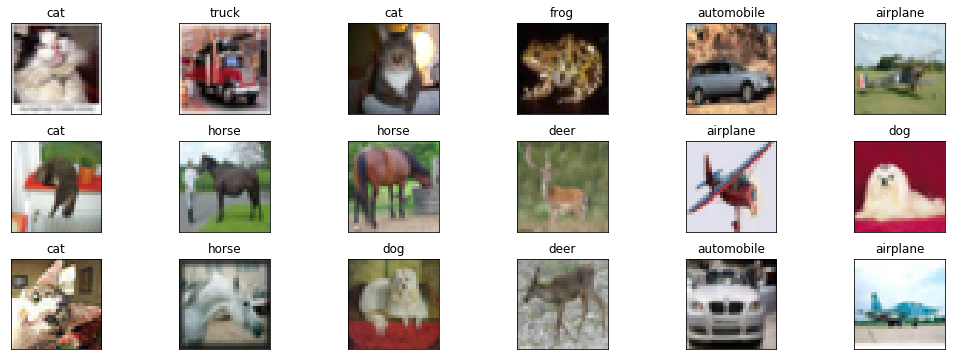

In [12]:
class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']

images_index = np.int32(np.round(np.random.rand(18,)*49000,0))

fig, axes = plt.subplots(3, 6, figsize=(18, 6),
                         subplot_kw={'xticks': [], 'yticks': []})

fig.subplots_adjust(hspace=0.3, wspace=0.05)

for ax, idx in zip(axes.flat, images_index):
    img = (X_tr[idx,:3072].reshape(32, 32, 3) + mean_img.reshape(32, 32, 3))/255.
    ax.imshow(img)
    ax.set_title(class_names[Y_tr[idx]])

### 3. Softmax Classifier

We will implement two version of loss functions for softmax classifier, and test it out on the CIFAR10 dataset.

First, implement the naive softmax loss function with nested loops.

You should complete naive_softmax_loss function in YourAnswer.py file.

Generate a random softmax weight matrix and use it to compute the loss. As a rough sanity check, our loss should be something close to -log(0.1).

In [13]:
W = np.random.randn(3073, 10) * 0.0001
loss, grad = naive_softmax_loss(W, X_tr, Y_tr, 0.0)

print ('loss :', loss)
print ('sanity check : ', -np.log(0.1))

loss : 2.3559247343650362
sanity check :  2.3025850929940455


The next thing is the vectorized softmax loss function. You can implement this function without loop statements.

Compare two versions. The two versions should compute the same results, but the vectorized version should be much faster.

In [14]:
s_time = time.time()
loss_naive, grad_naive = naive_softmax_loss(W, X_tr, Y_tr, 0.00001)
print ('naive loss : %e with %fs' % (loss_naive, time.time()-s_time))

s_time = time.time()
loss_vectorized, grad_vectorized = vectorized_softmax_loss(W, X_tr, Y_tr, 0.00001)
print ('vectorized loss : %e with %fs' % (loss_vectorized, time.time()-s_time))

print ('loss difference : %f' % np.abs(loss_naive - loss_vectorized))
print ('gradient difference : %f' % np.linalg.norm(grad_naive-grad_vectorized, ord='fro'))

naive loss : 2.355925e+00 with 8.034498s
vectorized loss : 2.355925e+00 with 0.174532s
loss difference : 0.000000
gradient difference : 0.000000


Now, you should implement the softmax classifier with softmax loss function you implemented above. Please go to YourFunction.py file and complete Softmax class.

Use the validatoin set to tune hyperparameters (regularization strength and learning rate).
You should test with different range for the learning rates and regularization strength;
With the best choice, you should be able to get the classification accuracy of over 0.34 on the validation set.

In [15]:
# results is dictionary mapping tuples of the form.
# (learning_rate, regularization_strength) to tuple of the form (training_accuracy, validation_accuracy).
# The accuracy is simply the fraction of data points that are correctly classified.
results = {}
best_val = -1
best_softmax = None
learning_rates = [1e-8, 1e-7, 5e-7, 1e-6]
regularization_strengths = [5e2, 1e3, 1e4, 5e4]
train_acc = 0
val_acc = 0
#########################################################################################################
# TODO : Write code that chooses the best hyperparameters by tuning on the validation set.              # 
#        For each combination of hyperparemeters, train a Softmax on the training set,                  #
#        compute its accuracy on the training and validatoin sets, and store these numbers in the       #
#        results dictionary. In addition, store the best validation accuracy in best_val                #
#        and the Softmax object that achieves this accuracy in best_softmax.                            #
#                                                                                                       #
# Hint : You should use a small value for num_iters as you develop your validation code so that the     #
#        Softmax don't take much time to train; once you are confident that your validation code works, #
#        you should rerun the validation code with a larger value for num_iter.                         #

#softmax = Softmax()
        
for l_rate in learning_rates:
    for reg in regularization_strengths:
#------------------------------------------WRITE YOUR CODE----------------------------------------------#
        softmax = Softmax()
        softmax.train(X_tr, Y_tr, X_val, Y_val, l_rate, reg, 200)
        train_acc = softmax.get_accuracy(X_tr, Y_tr)
        val_acc = softmax.get_accuracy(X_val, Y_val)
        
        if val_acc > best_val:
            best_val = val_acc
            best_softmax = softmax

#-----------------------------------------END OF YOUR CODE----------------------------------------------#
#########################################################################################################
        results[(l_rate,reg)] = (train_acc, val_acc)
for lr, reg in sorted(results):
    train_accuracy, val_accuracy = results[(lr, reg)]
    print ('lr %e reg %e train accuracy : %f, val accuracy : %f ' % (lr, reg, train_accuracy, val_accuracy))
    
print ('best validation accuracy achieved during cross-validation :', best_val)

lr 1.000000e-08 reg 5.000000e+02 train accuracy : 0.102122, val accuracy : 0.102000 
lr 1.000000e-08 reg 1.000000e+03 train accuracy : 0.113286, val accuracy : 0.124000 
lr 1.000000e-08 reg 1.000000e+04 train accuracy : 0.076531, val accuracy : 0.077000 
lr 1.000000e-08 reg 5.000000e+04 train accuracy : 0.103571, val accuracy : 0.089000 
lr 1.000000e-07 reg 5.000000e+02 train accuracy : 0.162469, val accuracy : 0.152000 
lr 1.000000e-07 reg 1.000000e+03 train accuracy : 0.179592, val accuracy : 0.174000 
lr 1.000000e-07 reg 1.000000e+04 train accuracy : 0.178306, val accuracy : 0.162000 
lr 1.000000e-07 reg 5.000000e+04 train accuracy : 0.215041, val accuracy : 0.229000 
lr 5.000000e-07 reg 5.000000e+02 train accuracy : 0.227694, val accuracy : 0.236000 
lr 5.000000e-07 reg 1.000000e+03 train accuracy : 0.231041, val accuracy : 0.223000 
lr 5.000000e-07 reg 1.000000e+04 train accuracy : 0.284776, val accuracy : 0.295000 
lr 5.000000e-07 reg 5.000000e+04 train accuracy : 0.333000, val a

Evaluate the best softmax on the test set.

In [16]:
Y_te_pred = best_softmax.predict(X_te)
test_accuracy = np.mean(Y_te == Y_te_pred)

print ('softmax on raw pixels final test set accuracy : ', test_accuracy)

softmax on raw pixels final test set accuracy :  0.361


### 4. Visualize test results

Visualize (Image, Predicted label) pairs of the best softmax model. Results may are not good because we train simple softmax classifier model.

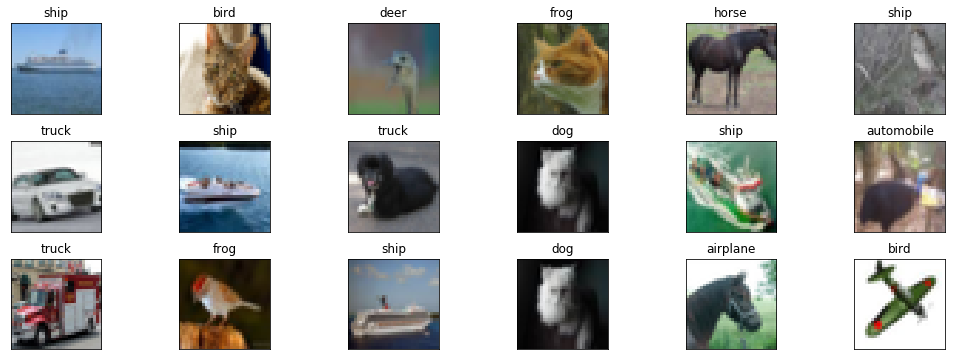

In [17]:
class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']

images_index = np.int32(np.round(np.random.rand(18,)*1000,0))

fig, axes = plt.subplots(3, 6, figsize=(18, 6),
                         subplot_kw={'xticks': [], 'yticks': []})

fig.subplots_adjust(hspace=0.3, wspace=0.05)

for ax, idx in zip(axes.flat, images_index):
    img = (X_te[idx,:3072].reshape(32, 32, 3) + mean_img.reshape(32, 32, 3))/255.
    ax.imshow(img)
    ax.set_title(class_names[Y_te_pred[idx]])
    

Visualize the learned weights for each class. Depending on your choice of learning rate and regularization strength, these may or may not be nice to look at.

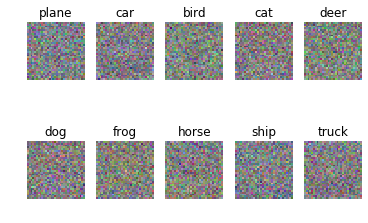

In [18]:
w = best_softmax.Weights[:-1, :]
w = w.reshape(32,32,3,10)

w_min, w_max = np.min(w), np.max(w)

classes = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
for i in range(10):
    plt.subplot(2,5,i+1)
    
    wimg=255.0*(w[:,:,:,i].squeeze() - w_min)/(w_max-w_min)
    plt.imshow(wimg.astype('uint8'))
    plt.axis('off')
    plt.title(classes[i])